In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
#data
mpis = {}
mpia12 = {}
mpia32 = {}
mus = {}
mpi_fpis = {}
setting_index = {}

label = "Physical point" #"Hoferichter et al. 2016" # https://arxiv.org/pdf/1602.07688.pdf
mpis[label] = [139.5704,0.002] #check, just used pdg physical point 130.41,0.03
mpi_fpis[label] = [1.0702, 0.0]
mus[label] = [139.5704/939.5654133,0.0]
mpia12[label] = [0.1788, 0.0] #0.0038]
mpia32[label] = [-0.0775, 0.0] #0.0035]
setting_index[label] = 2

label = "This work"
                #val #err
mpis[label] = [206.3,2.5]
mpi_fpis[label] = [2.208,0.007]
mus[label] = [0.211,0.0]
mpia12[label] = [0.142,0.022]
mpia32[label] = [-0.2735,0.0081]
setting_index[label] = 0

# label = "Hoferichtera et al. 2016"
# mpis[label] = []
# mpia12[label] = [0.1698,0.002]
# mpia32[label] = [-0.0863,0.0018]

label = "Fukugita et al. 1995" #table 3 https://arxiv.org/pdf/hep-lat/9501024.pdf
mpis[label] = [730, 0.0, 560, 0.0]
mpi_fpis[label] = [5.03468781, 0.0, 4.4026, 0.0]
mus[label] = [0.5080/1.080,0.0,0.3663/0.926,0.0]
mpia12[label] = [1.54,0.33,-0.25,0.21]
mpia32[label] = [-0.56,0.10,-0.48,0.08]
setting_index[label] = 5

label = "Lang and Verduci 2012" #https://arxiv.org/abs/1212.5055
mpis[label] = [255, 0.0]
# mpi_fpis[label] = [5.03468781, 0.0, 4.4026, 0.0]
# mus[label] = [0.5080/1.080,0.0,0.3663/0.926,0.0]
mpia12[label] = [1.41,0.37]
# mpia32[label] = [-0.56,0.10,-0.48,0.08]
setting_index[label] = 4

label = "Silvi et al 2021" #https://arxiv.org/abs/2101.00689
mpis[label] = [255, 0.0]
# mpi_fpis[label] = [5.03468781, 0.0, 4.4026, 0.0]
# mus[label] = [0.5080/1.080,0.0,0.3663/0.926,0.0]
# mpia12[label] = [1.41,0.37]
mpia32[label] = [0.057,0.81]
setting_index[label] = 3

In [3]:
mpis

{'Physical point': [139.5704, 0.002],
 'This work': [206.3, 2.5],
 'Fukugita et al. 1995': [730, 0.0, 560, 0.0],
 'Lang and Verduci 2012': [255, 0.0],
 'Silvi et al 2021': [255, 0.0]}

In [4]:
# mu=0.211
# Fpi=93.43 #check f = F/sqrt(2)
mNsq_fpisq = 2.0*(939.5654133**2)/(130.41**2)

# def mpia_minus_0(mpi): #mpi^2/fpi^2
#     return 2.0*mpi/(8.0*np.pi*(1+mu))*(1.0+gA*gA*mu*mu/4.0/(1-(mu*mu)/4.0))
# def mpia_plus_0(mpi):
#     return -2.0*mpi*gA*gA/(16.0*np.pi*(1+mu))*mu/(1-(mu*mu)/4.0)

def mpia_minus_0(mu,gA): #mpi^2/fpi^2
    return mNsq_fpisq*mu*mu/(8.0*np.pi*(1.0+mu))*(1.0+gA*gA*mu*mu/(4-mu*mu))
def mpia_plus_0(mu,gA):
    return mNsq_fpisq*mu*mu*gA*gA*mu/(4.0*np.pi*(1.0+mu)*(4.0-mu*mu))
def mpia_32_12(mpi,gA):
    return mpia_plus_0(mpi,gA) - mpia_minus_0(mpi,gA)
def mpia_12_12(mpi,gA):
    return mpia_plus_0(mpi,gA) + 2.0*mpia_minus_0(mpi,gA)

# def current_algebra_mpia_12_0(mpi)


In [5]:
mpislist = [np.floor(mpis[label][0]) for label in mpis.keys()]
mpislist.append(np.floor(mpis["Fukugita et al. 1995"][2]))

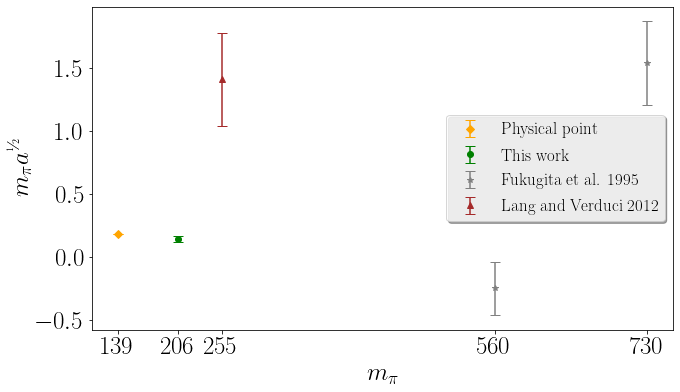

In [6]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

for key in mpis.keys():
    if key in mpia12.keys():
        for i in range(0,len(mpis[key]),2):
            this_label = None
            if not i:
                this_label = key
            plt.errorbar(x=mpis[key][i],y=mpia12[key][i],yerr=mpia12[key][i+1],color=settings.colors[setting_index[key]], marker=settings.markers[setting_index[key]], linewidth=0.0, label=this_label, elinewidth=1.5,capsize=5)
        
x = np.linspace(0.1,0.5,1000)
GA=1.267
# plt.plot(x,mpia_12_12(x,GA),color="black")
# plt.plot(x,mpia_12_12(x,0),color="black",ls="--")

plt.legend()
plt.xticks(ticks=list(set(mpislist)))
plt.xlabel(r"$m_\pi$")
# plt.xlabel(r"$m_\pi/m_N$")
plt.ylabel(r"$m_\pi a^{\textup{\sfrac{1}{2}}}$") #,rotation="horizontal")
plt.tight_layout()
plt.savefig("mpi12a.pdf")

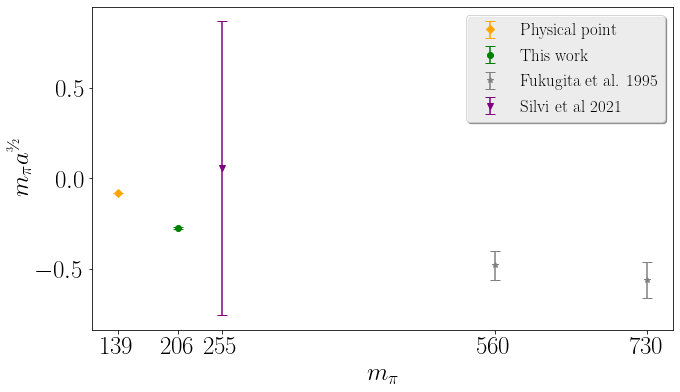

In [7]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

for key in mpis.keys():
    if key in mpia32.keys():
        for i in range(0,len(mpis[key]),2):
            this_label = None
            if not i:
                this_label = key
            plt.errorbar(x=mpis[key][i],y=mpia32[key][i],yerr=mpia32[key][i+1],color=settings.colors[setting_index[key]], marker=settings.markers[setting_index[key]], linewidth=0.0, label=this_label, elinewidth=1.5,capsize=5)
        
GA=1.267
# plt.plot(x,mpia_32_12(x,GA),color="black")
# plt.plot(x,mpia_32_12(x,0),color="black",ls="--")

plt.legend()
plt.xticks(ticks=list(set(mpislist)))
plt.xlabel(r"$m_\pi$")
# plt.xlabel(r"$m_\pi/m_N$")
plt.ylabel(r"$m_\pi a^{\textup{\sfrac{3}{2}}}$") #,rotation="horizontal")
plt.tight_layout()
plt.savefig("mpi32a.pdf")

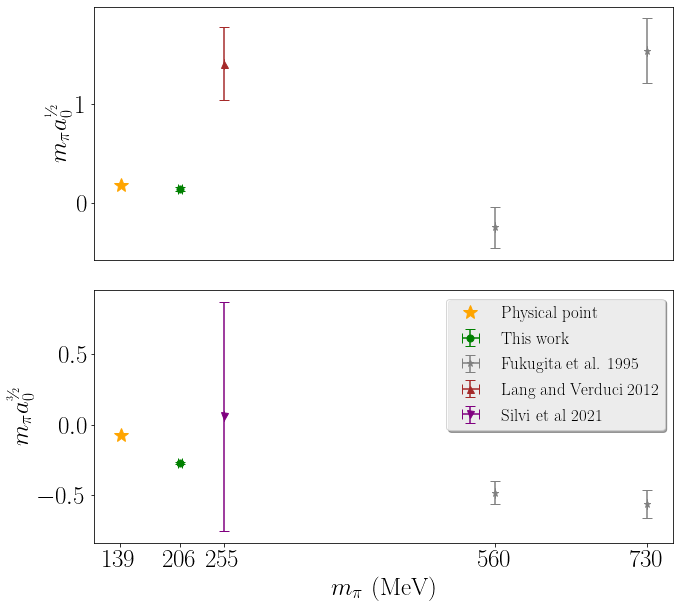

In [9]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(9)

plt.subplot(2, 1, 1)

all_handles = {}
for key in mpis.keys():
    if key in mpia12.keys():
        for i in range(0,len(mpis[key]),2):
            this_marker = settings.markers[setting_index[key]]
            this_marker_size = 7
            if key=="Physical point":
                this_marker = '*'
                this_marker_size = 15
            
            this_label = None
            if not i:
                this_label = key
                if mpia12[key][i+1]:
                    all_handles[key] = plt.errorbar(x=mpis[key][i],y=mpia12[key][i],xerr=mpis[key][i+1],yerr=mpia12[key][i+1],color=settings.colors[setting_index[key]], marker=this_marker, linewidth=0.0, label=this_label, elinewidth=1.5,capsize=5,markersize=this_marker_size)
                else:
                    all_handles[key], = plt.plot(mpis[key][i],mpia12[key][i],color=settings.colors[setting_index[key]], marker=this_marker, linewidth=0.0, label=this_label,markersize=this_marker_size)
            else:
                if mpia12[key][i+1]:
                    plt.errorbar(x=mpis[key][i],y=mpia12[key][i],xerr=mpis[key][i+1],yerr=mpia12[key][i+1],color=settings.colors[setting_index[key]], marker=this_marker, linewidth=0.0, label=this_label, elinewidth=1.5,capsize=5,markersize=this_marker_size)
                else:
                    plt.plot(mpis[key][i],mpia12[key][i],color=settings.colors[setting_index[key]], marker=this_marker, linewidth=0.0, label=this_label,markersize=this_marker_size)
        
plt.xticks([])
plt.ylabel(r"$m_\pi a^{\textup{\sfrac{1}{2}}}_0$") #,rotation="horizontal")

plt.subplot(2, 1, 2)

for key in mpis.keys():
    if key in mpia32.keys():
        for i in range(0,len(mpis[key]),2):
            this_marker = settings.markers[setting_index[key]]
            this_marker_size = 7
            if key=="Physical point":
                this_marker = '*'
                this_marker_size = 15
                
            this_label = None
            if not i:
                this_label = key
                if mpia32[key][i+1]:
                    all_handles[key] = plt.errorbar(x=mpis[key][i],y=mpia32[key][i],xerr=mpis[key][i+1],yerr=mpia32[key][i+1],color=settings.colors[setting_index[key]], marker=this_marker, linewidth=0.0, label=this_label, elinewidth=1.5,capsize=5,markersize=this_marker_size)
                else:
                    all_handles[key], = plt.plot(mpis[key][i],mpia32[key][i],color=settings.colors[setting_index[key]], marker=this_marker, linewidth=0.0, label=this_label,markersize=this_marker_size)
            else:
                if mpia32[key][i+1]:
                    plt.errorbar(x=mpis[key][i],y=mpia32[key][i],xerr=mpis[key][i+1],yerr=mpia32[key][i+1],color=settings.colors[setting_index[key]], marker=this_marker, linewidth=0.0, label=this_label, elinewidth=1.5,capsize=5,markersize=this_marker_size)
                else:
                    plt.plot(mpis[key][i],mpia32[key][i],color=settings.colors[setting_index[key]], marker=this_marker, linewidth=0.0, label=this_label,markersize=this_marker_size)

plt.legend(handles=all_handles.values())
plt.ylabel(r"$m_\pi a^{\textup{\sfrac{3}{2}}}_0$") #,rotation="horizontal")
plt.xticks(ticks=list(set(mpislist)))
plt.xlabel(r"$m_\pi$ (MeV)")
plt.tight_layout()
plt.savefig("scat_lengths.pdf")